In [10]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = pd.read_csv('MSFT.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.071132,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.073673,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.074943,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.073038,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.071768,47894400


In [3]:
stock.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 7 columns):
Date         8163 non-null object
Open         8163 non-null float64
High         8163 non-null float64
Low          8163 non-null float64
Close        8163 non-null float64
Adj Close    8163 non-null float64
Volume       8163 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 446.5+ KB


In [7]:
stock.Date = pd.to_datetime(stock.Date)
min(stock.Date), max(stock.Date)
# 32-year duration

(Timestamp('1986-03-13 00:00:00'), Timestamp('2018-07-30 00:00:00'))

In [11]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8.163000e+03
mean,23.961199,24.225893,23.697838,23.966033,20.013666,6.193038e+07
std,20.410153,20.594311,20.216426,20.412222,19.356876,3.904020e+07
min,0.088542,0.092014,0.088542,0.090278,0.066052,2.304000e+06
25%,2.904297,2.945313,2.871094,2.908203,2.127781,3.856800e+07
50%,25.815001,26.110001,25.540001,25.809999,19.678543,5.504460e+07
75%,31.615001,32.045000,31.214374,31.678750,25.176462,7.540815e+07
max,110.739998,111.150002,109.500000,110.830002,110.830002,1.031789e+09


In [12]:
df = stock.drop(columns=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.088542,0.101563,0.088542,0.097222,0.071132,1031788800
1,0.097222,0.102431,0.097222,0.100694,0.073673,308160000
2,0.100694,0.103299,0.100694,0.102431,0.074943,133171200
3,0.102431,0.103299,0.098958,0.099826,0.073038,67766400
4,0.099826,0.100694,0.097222,0.098090,0.071768,47894400


In [18]:
df.values[:5, :]

array([[8.854e-02, 1.016e-01, 8.854e-02, 9.722e-02, 7.113e-02, 1.032e+09],
       [9.722e-02, 1.024e-01, 9.722e-02, 1.007e-01, 7.367e-02, 3.082e+08],
       [1.007e-01, 1.033e-01, 1.007e-01, 1.024e-01, 7.494e-02, 1.332e+08],
       [1.024e-01, 1.033e-01, 9.896e-02, 9.983e-02, 7.304e-02, 6.777e+07],
       [9.983e-02, 1.007e-01, 9.722e-02, 9.809e-02, 7.177e-02, 4.789e+07]])

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaled = scaler.fit_transform(df)
np.set_printoptions(precision=3)   # precision: no. of digits of precision for floating point output (default 8)
rescaled[:5, :]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.000e+00, 8.598e-05, 0.000e+00, 6.271e-05, 4.586e-05, 1.000e+00],
       [7.844e-05, 9.380e-05, 7.933e-05, 9.406e-05, 6.880e-05, 2.971e-01],
       [1.098e-04, 1.016e-04, 1.111e-04, 1.097e-04, 8.027e-05, 1.271e-01],
       [1.255e-04, 1.016e-04, 9.520e-05, 8.622e-05, 6.307e-05, 6.359e-02],
       [1.020e-04, 7.816e-05, 7.933e-05, 7.054e-05, 5.161e-05, 4.428e-02]])

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized = scaler.fit_transform(df)
np.set_printoptions(precision=3)
standardized[:5, :]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.17 , -1.171, -1.168, -1.169, -1.03 , 24.844],
       [-1.169, -1.171, -1.167, -1.169, -1.03 ,  6.307],
       [-1.169, -1.171, -1.167, -1.169, -1.03 ,  1.825],
       [-1.169, -1.171, -1.167, -1.169, -1.03 ,  0.149],
       [-1.169, -1.172, -1.167, -1.169, -1.03 , -0.36 ]])

In [21]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
normalized = scaler.fit_transform(df)
np.set_printoptions(precision=3)
normalized[:5, :]

array([[8.581e-11, 9.843e-11, 8.581e-11, 9.423e-11, 6.894e-11, 1.000e+00],
       [3.155e-10, 3.324e-10, 3.155e-10, 3.268e-10, 2.391e-10, 1.000e+00],
       [7.561e-10, 7.757e-10, 7.561e-10, 7.692e-10, 5.628e-10, 1.000e+00],
       [1.512e-09, 1.524e-09, 1.460e-09, 1.473e-09, 1.078e-09, 1.000e+00],
       [2.084e-09, 2.102e-09, 2.030e-09, 2.048e-09, 1.498e-09, 1.000e+00]])

In [29]:
from sklearn.preprocessing import Binarizer
scaler = Binarizer(threshold=0.1)   # just example
binary = scaler.fit_transform(df)
binary[:5, :]

array([[0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.]])

In [47]:
rescaled_df = pd.DataFrame(rescaled, columns = df.columns)
rescaled_df.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.000000,0.000086,0.000000,0.000063,0.000046,1.000000
1,0.000078,0.000094,0.000079,0.000094,0.000069,0.297096
2,0.000110,0.000102,0.000111,0.000110,0.000080,0.127119
3,0.000126,0.000102,0.000095,0.000086,0.000063,0.063588
4,0.000102,0.000078,0.000079,0.000071,0.000052,0.044285


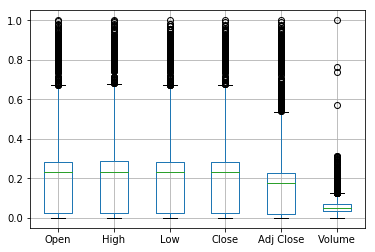

In [48]:
# MinMaxScaler()
rescaled_df.boxplot()

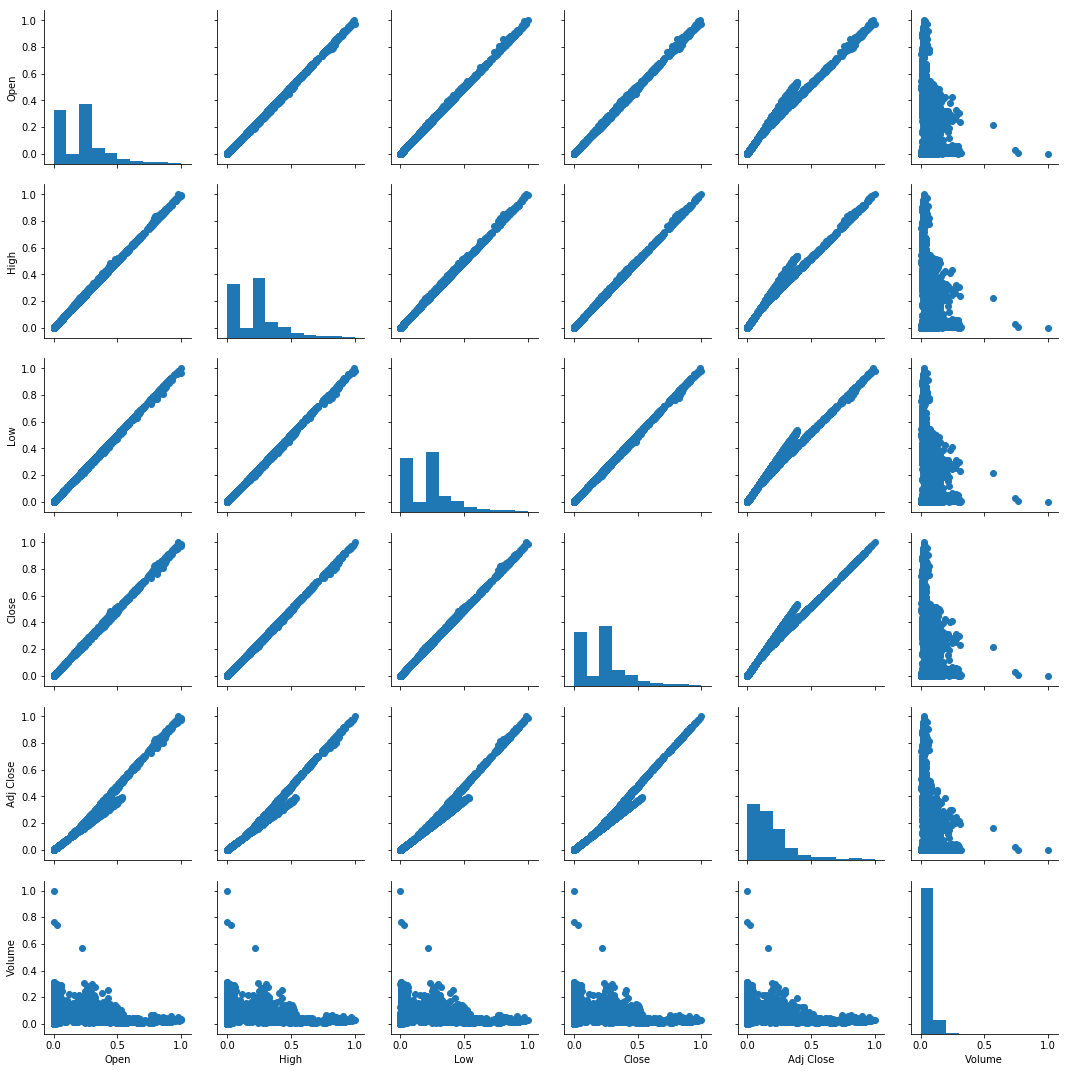

In [49]:
g = sns.PairGrid(rescaled_df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [35]:
standardized_df = pd.DataFrame(standardized, columns = df.columns)
standardized_df.head()

,Open,High,Low,Close,Adj Close,Volume
0,-1.169718,-1.171479,-1.167899,-1.169411,-1.030319,24.844082
1,-1.169292,-1.171437,-1.167470,-1.169241,-1.030188,6.307466
2,-1.169122,-1.171395,-1.167298,-1.169156,-1.030122,1.824919
3,-1.169037,-1.171395,-1.167384,-1.169283,-1.030220,0.149497
4,-1.169165,-1.171521,-1.167470,-1.169368,-1.030286,-0.359548


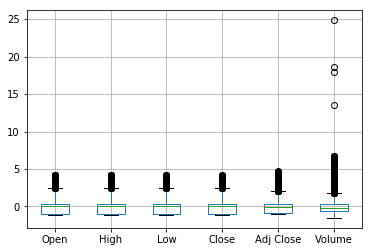

In [36]:
# StandardScaler()
standardized_df.boxplot()

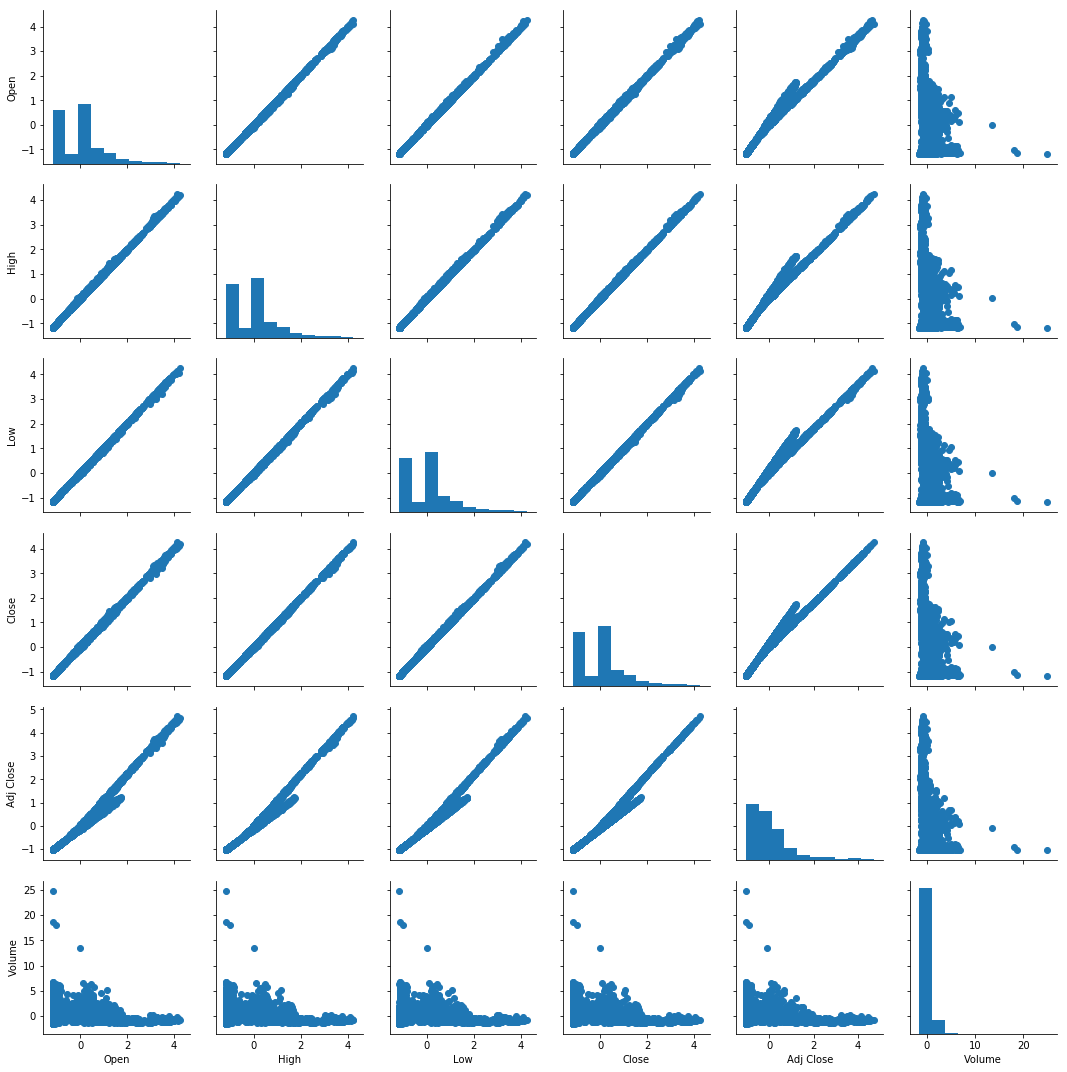

In [44]:
g = sns.PairGrid(standardized_df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [33]:
normalized_df = pd.DataFrame(normalized, columns = df.columns)
normalized_df.head()

,Open,High,Low,Close,Adj Close,Volume
0,8.581407e-11,9.843390e-11,8.581407e-11,9.422665e-11,6.894047e-11,1.0
1,3.154920e-10,3.323955e-10,3.154920e-10,3.267588e-10,2.390739e-10,1.0
2,7.561244e-10,7.756857e-10,7.561244e-10,7.691678e-10,5.627568e-10,1.0
3,1.511531e-09,1.524339e-09,1.460281e-09,1.473090e-09,1.077791e-09,1.0
4,2.084294e-09,2.102417e-09,2.029924e-09,2.048047e-09,1.498463e-09,1.0


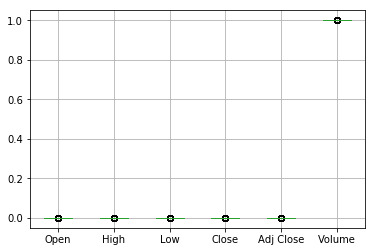

In [42]:
# Normalizer()
normalized_df.boxplot()

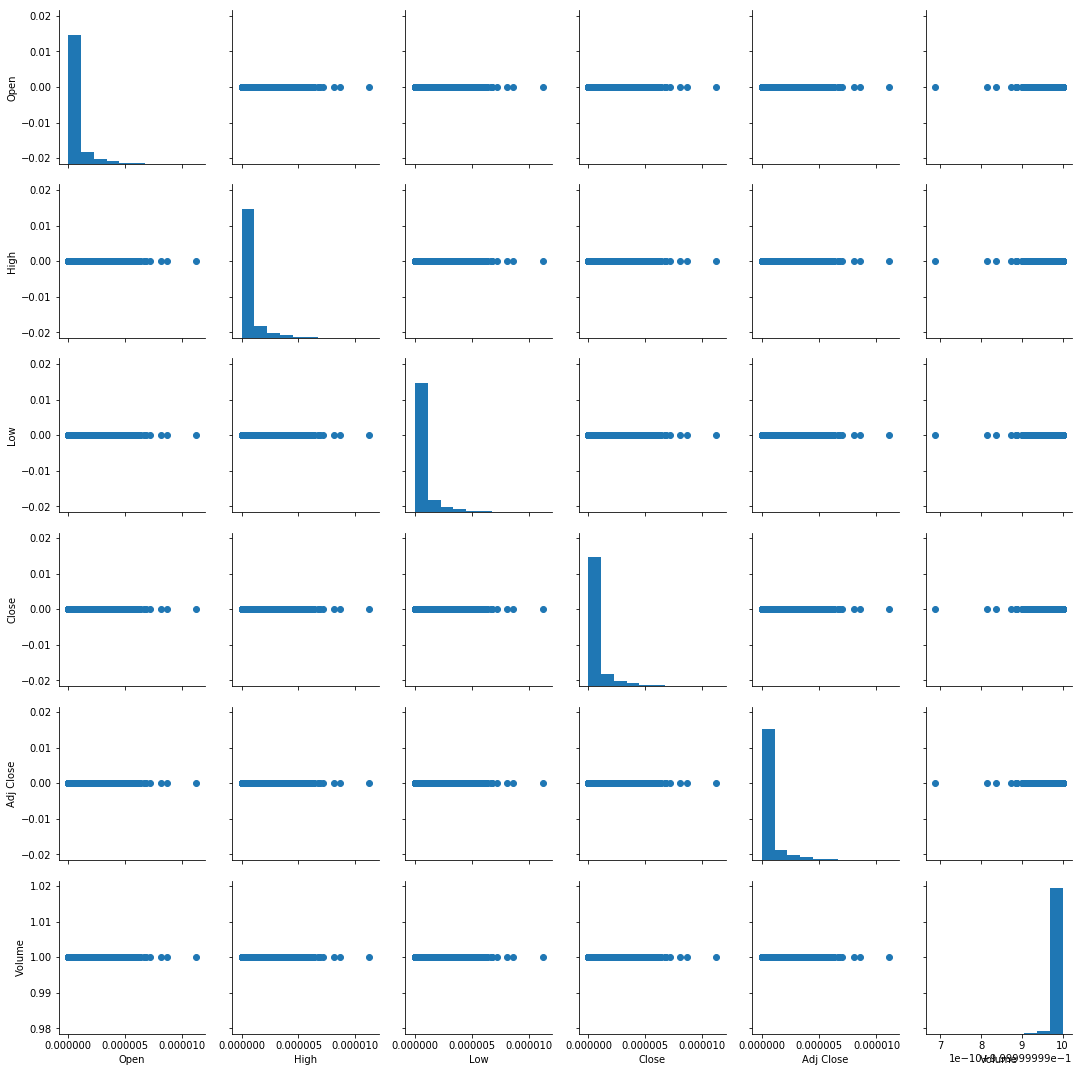

In [45]:
g = sns.PairGrid(normalized_df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

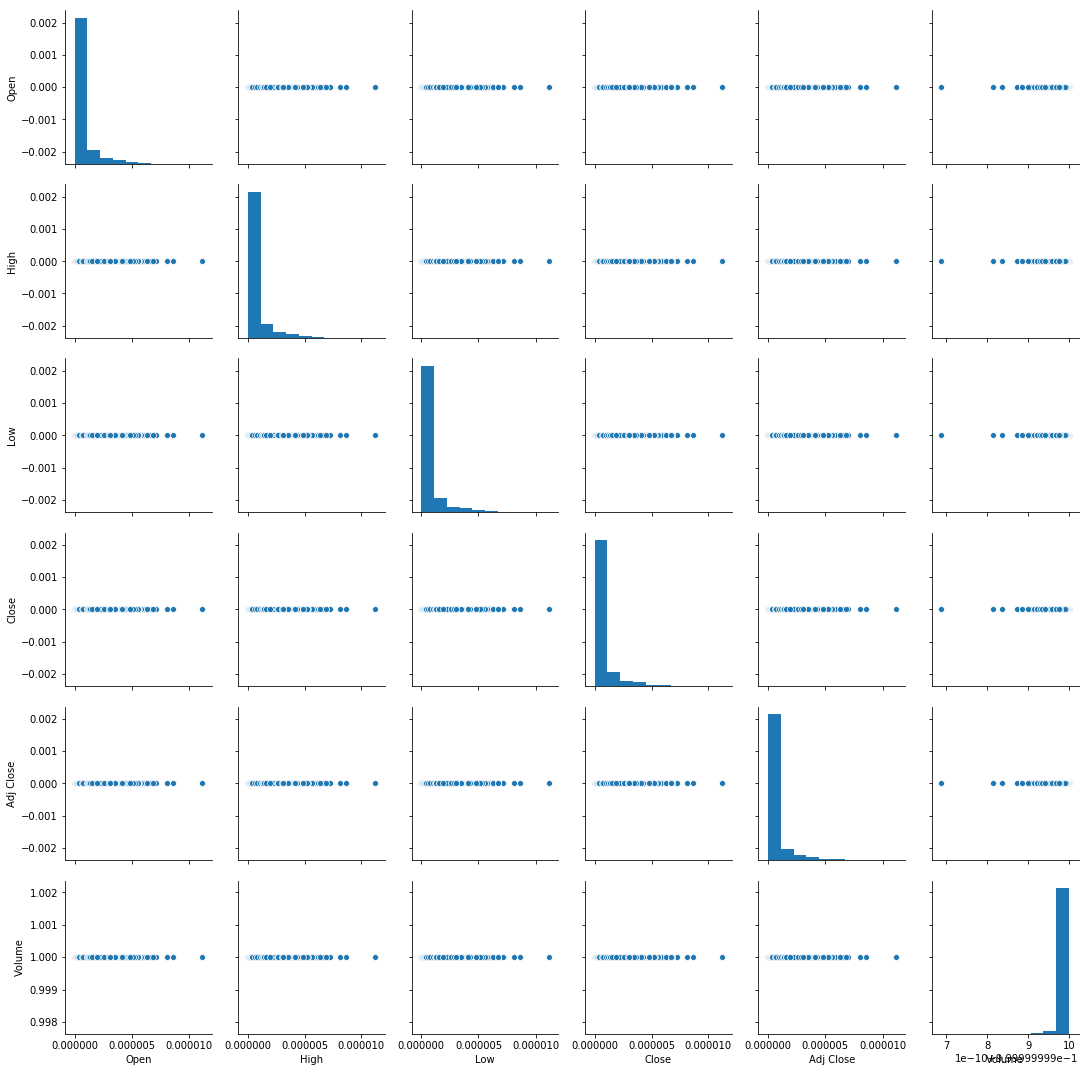

In [50]:
# alternate code
sns.pairplot(normalized_df)